In [1]:
import numpy as np;
import matplotlib as mp;
import matplotlib.pyplot as plt;
import math;

# Random variables and distributions

## A general random number generator

Suppose $X$ has a CDF $F(x)$, which means that $F(x): \mathbb{R}\rightarrow [0,1]$, and let us assume that $F(x)$ is invertible. Based on that,  **we can generate random numbers simulating draws from $F$** as follows:
 - We generate random numbers with uniform distribution in the $[0,1]$ interval, i.e., $Y\sim$Uni(0,1), and $y_i$ are drawn from $Y$,
 - We define $X=F^{-1}(Y)$, thus, $x_i = F^{-1}(y_i)$. 

To prove that this actually works, let us consider the probability that $X<z\in \mathbb{R}$. This can be given as
\begin{equation}
P(X<z)=P\left(F(X)<F(z)\right)=P\left(F[F^{-1}(Y)]< F(z)\right)=P(Y<F(z)). \nonumber
\end{equation}
Since $Y$ has a uniform distribution over the $[0,1]$ interval, the probability that $Y<y$ is simply $P(Y<y)=y$, thus, 
\begin{equation}
P(X<z)=P(Y<F(z))=F(z), \nonumber
\end{equation}
which means that the CDF of $X$ is actually $F(z)$.

### Illustration with exponentially distributed random numbers

Let us test this in case of the Exponential distribution, where the CDF is $F(x)=1-e^{-\frac{x}{\lambda}}$. The inverse can be expressed as $F^{-1}(y)=-\lambda\ln(1-y)$.

First we define a function which generates uniform random numbers in the $[0,1]$ interval using the built in random generator of numpy, and then transforms these according to $F^{-1}$, returning a list of exponentially distributed random numbers.

In [2]:
def Gen_exp_rand(lam_value,num_rands):
    rand_list = np.random.random(num_rands);
    return [-lam_value*math.log(1.0-y) for y in rand_list];
    #return list(map(lambda y: -math.log(1-y)/lam_value,rand_list));
    #return np.array([ -math.log(1.0-y)/lam_value for y in rand_list]);

We set the parameter of the distribution:

In [3]:
exp_lambda = 8.25;

Then we generate a list of say, 1000 random numbers:

In [4]:
try_list = Gen_exp_rand(exp_lambda,10000);
#print(try_list);

We can plot the result using the histogram plot of pyplot. To check whether they really follow the exponential distribution, we plot aside the PDF of the exponential distribution as well.

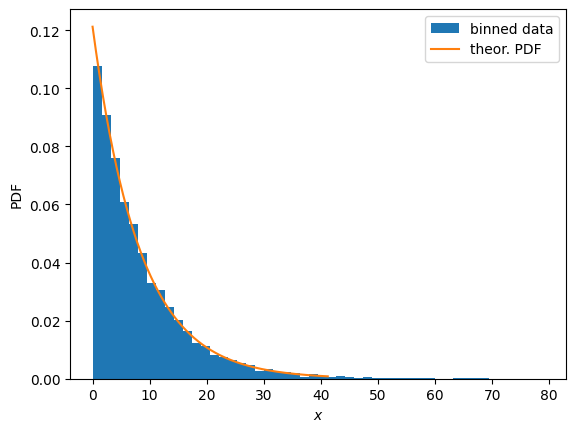

In [5]:
# pyplot can automatically gather the data into bins, and also normalise it:
plt.hist(try_list,50,density=True, label='binned data'); # Here we shall have 50 equal bins.

# let us also plot the theoretical PDF. 
x_vec=np.arange(0,5*exp_lambda,0.1);    # these are just x values, and for each we calculate the corresponding y
y=[math.exp(-x/exp_lambda)/exp_lambda for x in x_vec];
plt.plot(x_vec,y,label='theor. PDF');
plt.xlabel('$x$');
plt.ylabel('PDF');
plt.legend();
plt.show();

## Generating random samples with numpy

Of course, for a simple distribution like the Exponential distribution, numpy provides a direct solution, and we do not have to use the inversion trick. In fact, numpy can generate random numbers according to quite a few distributions. Let us try out a couple of these.

### Normal distribution

In [6]:
mu,sigma,num_points = 20,35,50000;
normal_data = np.random.normal(mu,sigma,num_points);

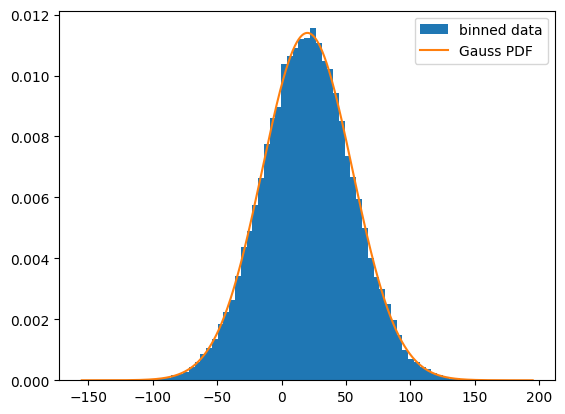

In [22]:
plt.clf();
plt.hist(normal_data,70,density=True, label='binned data');
x_vec=np.arange(mu-5*sigma,mu+5*sigma,0.2); 
y=[math.exp(-(x-mu)**2.0/2.0/sigma**2.0)/(math.sqrt(2.0*np.pi)*sigma) for x in x_vec];
plt.plot(x_vec,y,label ='Gauss PDF')
plt.legend();
plt.show();

### Gamma distribution

In [8]:
gamma_q, gamma_lambda, num_points = 3,5.6,50000;
gamma_data = np.random.gamma(gamma_q,gamma_lambda,num_points);

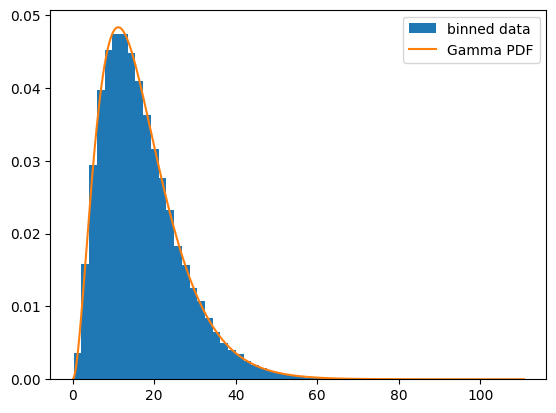

In [9]:
plt.clf();
plt.hist(gamma_data,50,density=True, label='binned data');
x_vec=np.arange(0.1,gamma_lambda*gamma_q+gamma_lambda**2.0*gamma_q,0.2); 
y=[x**(gamma_q-1.0)*math.exp(-x/gamma_lambda)/(gamma_lambda**gamma_q*math.gamma(gamma_q)) for x in x_vec];
plt.plot(x_vec,y,label ='Gamma PDF')
plt.legend();
plt.show();

### $\chi^2$ distribution

In [10]:
chi_q,num_points = 7,50000;
chi_sq_data = np.random.chisquare(chi_q,num_points);

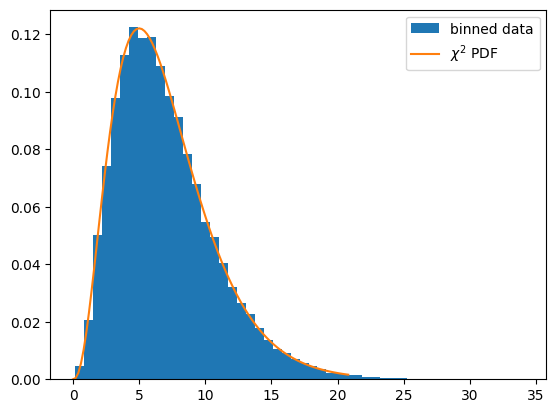

In [11]:
plt.hist(chi_sq_data,50,density=True, label='binned data');
x_vec=np.arange(0,chi_q*3,0.2); 
y=[x**(chi_q/2.0-1.0)*math.exp(-x/2.0)/2**(chi_q/2.0)/math.gamma(chi_q/2.0) for x in x_vec];
plt.plot(x_vec,y,label ='$\chi^2$ PDF')
plt.legend();
plt.show();

### Cauchy distribution

In [12]:
num_points = 50000;
cauchy_data = np.random.standard_cauchy(num_points);

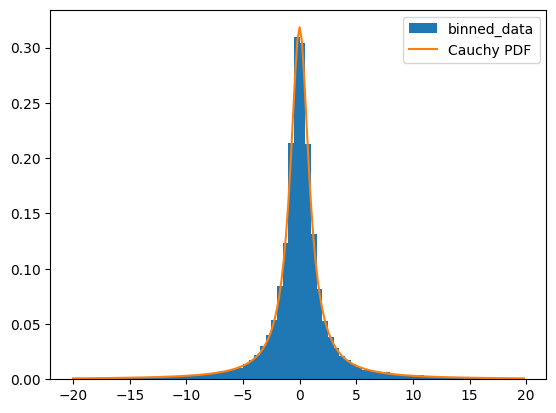

In [23]:
#plt.hist(cauchy_data,50,density=True,label='binned_data');
plt.hist(cauchy_data,np.arange(-20,20,0.5),density=True, label='binned_data');
x_vec=np.arange(-20,20,0.2); 
y=[1.0/np.pi*1.0/(1+x*x) for x in x_vec];
plt.plot(x_vec,y,label ='Cauchy PDF')
plt.legend();
plt.show();

The Cauchy distribution is a fat tailed one, thus, samples with extreme large deviation from the average can occur with much larger frequency compared to e.g., a Normal distribution. Therefore, if dividing the x range into say 50 equally spaced bins, then the "bulk" of the distribution is contained in a single (or a few) bins. 

## Pareto distribution

A heavy tailed distribution where we can actualy change the shape of the distribution with the help of parameters is given by the **Pareto distribution** , having a PDF written as
\begin{equation}
\rho(x) =  a \frac{x_m^a}{x^{a+1}}, \nonumber
\end{equation}
where $x$ is assumed to be $x\geq x_m$.

A closely related distribution is the **Lomax distribution**, which is essentially a Pareto distribution shifted such that its support is $[0,\infty]$ instead of $[m,\infty]$. The PDF of the Lomax distribution is given by
\begin{equation}
\rho(x) = \frac{a}{m}\left[1+\frac{x}{m}\right]^{-(a+1)}. \nonumber
\end{equation}

Numpy has a function numpy.random.pareto(), which generates random numbers drawn from the Lomax distribution. Let's try it out!

In [14]:
a = 1.5
pareto_data = np.random.pareto(a,num_points);  # the m parameter is 1 by default.

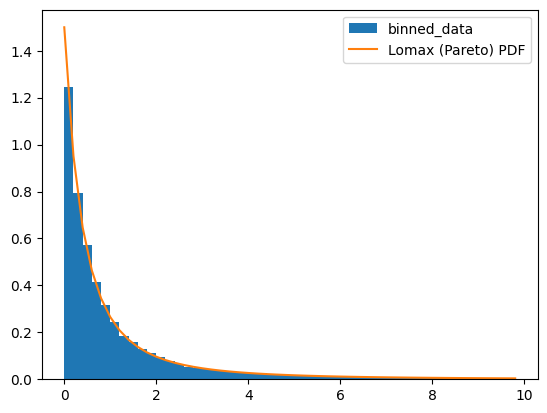

In [15]:
plt.clf();
plt.hist(pareto_data,np.arange(0,10,0.2),density=True, label='binned_data');
x_vec=np.arange(0,10,0.2); 
y=[a*(1.0+x)**(-1.0-a) for x in x_vec];
plt.plot(x_vec,y,label ='Lomax (Pareto) PDF')
plt.legend();
plt.show();

#### How to obtain random sample drawn really from Pareto distribution and not Lomax? 

In general, if $Y=bX+c$, then 
\begin{equation}
\rho_Y(y)=\rho_X\left(\frac{y-c}{b}\right)\frac{1}{|b|}. \nonumber
\end{equation}
Based on that and using the fact that PDF of $X$ generated by numpy is 
\begin{equation}
\rho_X(x)=\frac{a}{(1+x)^{1+a}},
\end{equation}
we can figure out that the solution is to use an $Y$ written as
\begin{eqnarray}
& &Y=x_m*X+x_m=x_m*(X+1), \nonumber \\
&\rightarrow& \rho_Y(y) = \rho_X\left(\frac{x-x_m}{x_m}\right)\frac{1}{x_m}=\frac{a}{(x/x_m)^{1+a}}\frac{1}{x_m}=
a\frac{x_m^a}{x^{1+a}}\nonumber 
\end{eqnarray}

Let's check it right away.

In [16]:
x_m = 5.0;
real_pareto_data = (np.random.pareto(a,num_points)+1.0)*x_m;

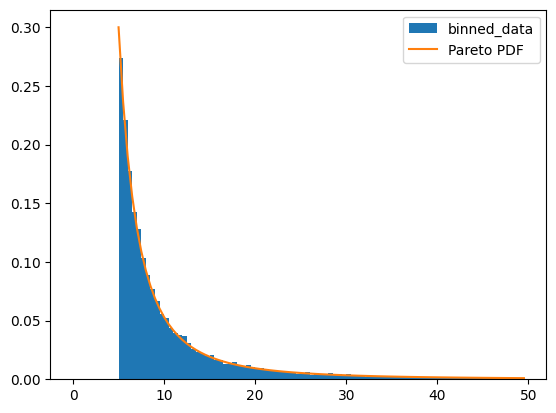

In [17]:
plt.clf();
plt.hist(real_pareto_data,np.arange(0,50,0.5),density=True, label='binned_data');
x_vec=np.arange(x_m,50,0.5); 
y=[a*x_m**a/x**(1.0+a) for x in x_vec];
plt.plot(x_vec,y,label ='Pareto PDF')
plt.legend();
plt.show();

## Logarithmic binning

When dealing with a heavy tailed distribution, it is usually worthy to plot it also on log-log scale, because the tail of the distribution becomes much more visible. 

However, in order to plot data on logarithmic scale, it would be nice to apply logarithmic binning, where the size of the bins looks even on log-scale (which means that their size is increasing exponentially). Luckily, numpy has a logspace function which can be used for this purpose.

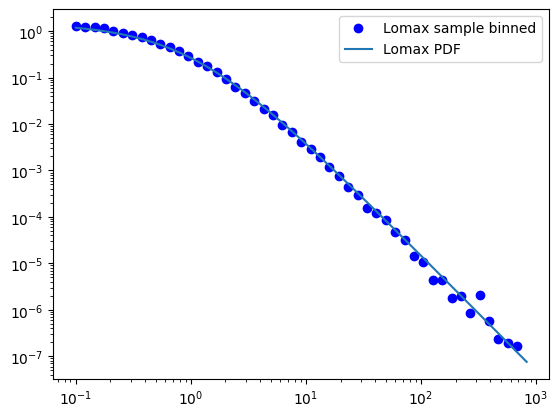

In [18]:
plt.clf();
hist,bins = np.histogram(pareto_data,bins=np.logspace(-1,3,50),density=True);
plt.loglog(bins[:-1],hist,'bo', label='Lomax sample binned');
y=[a*(1.0+x)**(-1.0-a) for x in bins[:-1]];
plt.plot(bins[:-1],y,label ='Lomax PDF');
plt.legend();
plt.show();

The logarithmic plot is also better when we have doubts whether two distributions decay with the same exponent or not. 

To illustrate this, let us generate data drawn from Lomax distribution with a different exponent, and plot the two PDF first on linear scale, then on logarithmic scale. 

In [19]:
b = 2.0;
pareto_alt = np.random.pareto(b,num_points);

First, the linear plot with fixed $x$ range.

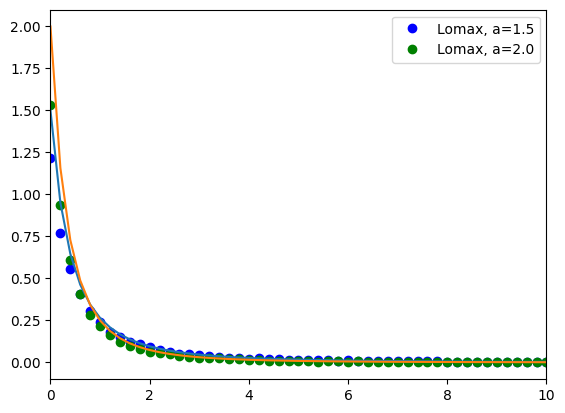

In [20]:
plt.clf();
hist_a,bins_a = np.histogram(pareto_data,bins= np.arange(0,50,0.2),density=True);
plt.plot(bins_a[:-1],hist_a,'bo', label='Lomax, a='+str(a));

hist_b,bins_b = np.histogram(pareto_alt,bins=np.arange(0,50,0.2), density = True);
plt.plot(bins_b[:-1],hist_b,'go', label = 'Lomax, a='+str(b));

y_a=[a*(1.0+x)**(-1.0-a) for x in bins_a[:-1]];
y_b=[b*(1.0+x)**(-1.0-b) for x in bins_b[:-1]];
plt.plot(bins_a[:-1],y_a);
plt.plot(bins_b[:-1],y_b);
plt.xlim(0,10);
plt.legend();
plt.show();

And now, the same on logarithmic scale.

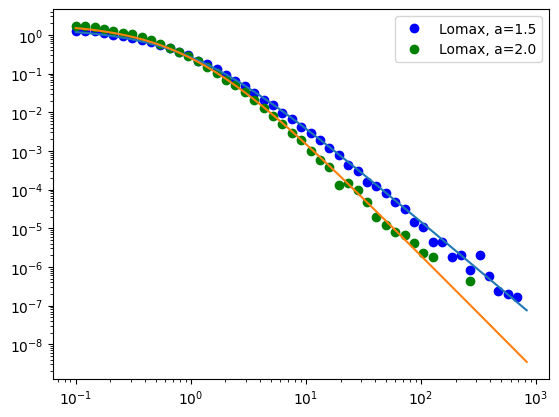

In [21]:
plt.clf();
hist_a,bins_a = np.histogram(pareto_data,bins=np.logspace(-1,3,50),density=True);
plt.loglog(bins_a[:-1],hist_a,'bo', label='Lomax, a='+str(a));

hist_b,bins_b = np.histogram(pareto_alt,bins=np.logspace(-1,3,50), density = True);
plt.loglog(bins_b[:-1],hist_b,'go', label = 'Lomax, a='+str(b));

y_a=[a*(1.0+x)**(-1.0-a) for x in bins_a[:-1]];
y_b=[b*(1.0+x)**(-1.0-b) for x in bins_b[:-1]];
plt.plot(bins_a[:-1],y_a);
plt.plot(bins_b[:-1],y_b);
plt.legend();
plt.show();